In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
file = pd.read_csv('/home/ashish/Downloads/MBA/MBA_1/MBA_dataset.csv',index_col=0)
file.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Number of Transactions recorded are",file.shape[0])

Number of Transactions recorded are 14963


Transforming the data with TransactionEncoder to convert into a process the data


In [4]:
transs=[]
for i in range(0,file.shape[0]):
    transs.append([str(file.values[i,j]) for j in range(0,file.shape[1])])
transs= np.array(transs)
print(transs.shape)
transs

(14963, 11)


array([['whole milk', 'pastry', 'salty snack', ..., 'nan', 'nan', 'nan'],
       ['sausage', 'whole milk', 'semi-finished bread', ..., 'nan',
        'nan', 'nan'],
       ['soda', 'pickled vegetables', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['fruit/vegetable juice', 'onions', 'nan', ..., 'nan', 'nan',
        'nan'],
       ['bottled beer', 'other vegetables', 'nan', ..., 'nan', 'nan',
        'nan'],
       ['soda', 'root vegetables', 'semi-finished bread', ..., 'nan',
        'nan', 'nan']], dtype='<U25')

In [5]:
te = TransactionEncoder()
data = te.fit_transform(transs)
data = pd.DataFrame(data, columns = te.columns_,dtype = int)
data.drop('nan',axis = 1, inplace =True)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Top 25 Items sold out of 168 items

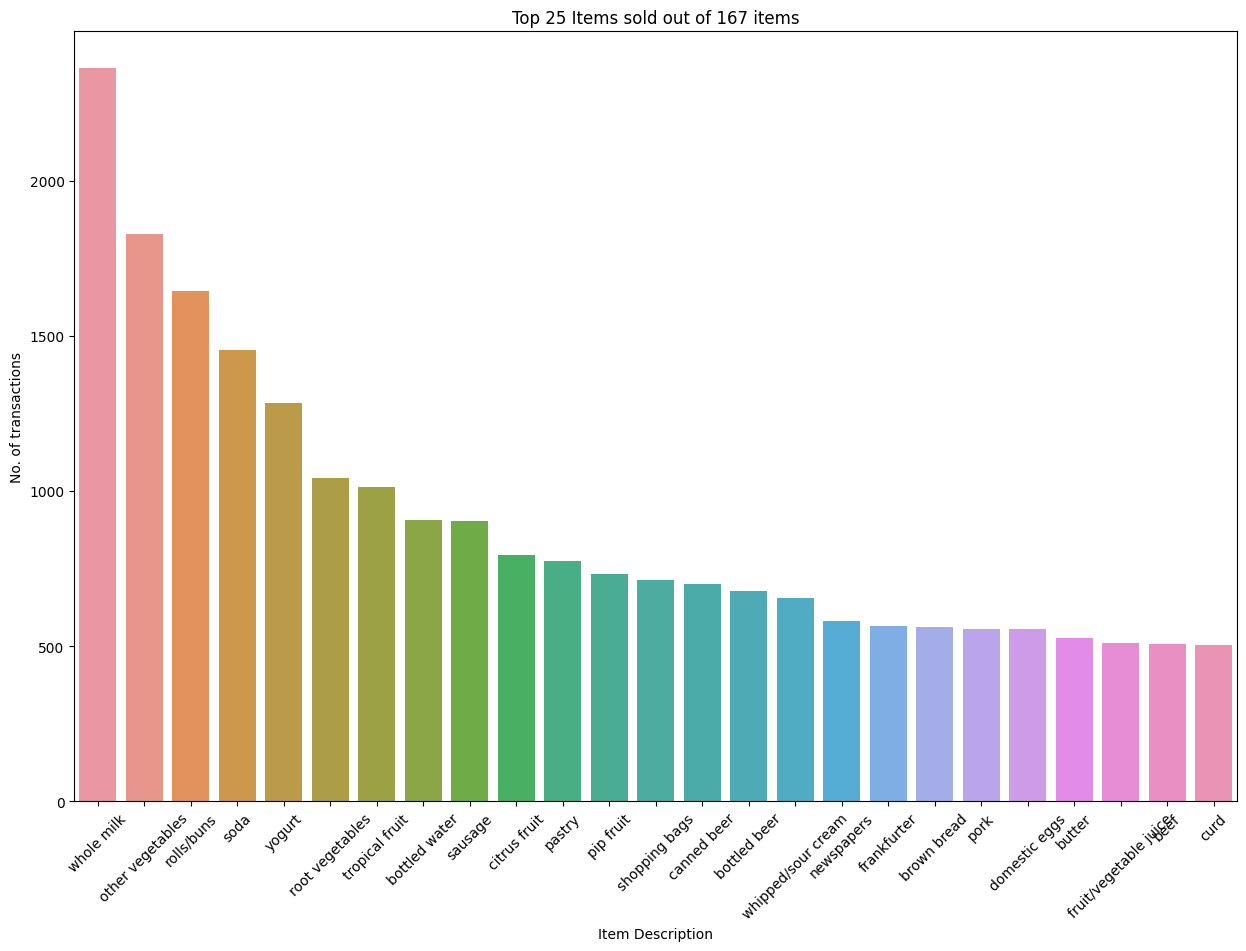

In [6]:
sum = data.sum(axis = 0).sort_values(ascending=False)[:25]
plt.figure(figsize=(15,10))
sns.barplot(x= sum.index,y =  sum.values)
plt.xlabel('Item Description')
plt.ylabel('No. of transactions')
plt.xticks(rotation = 45)
plt.title('Top 25 Items sold out of {} items'.format(data.shape[1]))
plt.show()

Apriori algorithm

In [7]:
apr = apriori(data, min_support = 0.001, use_colnames = True)
apr

/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(whole milk, rolls/buns, sausage)"
746,0.001002,"(whole milk, rolls/buns, soda)"
747,0.001337,"(whole milk, rolls/buns, yogurt)"
748,0.001069,"(whole milk, soda, sausage)"


Now, that our algorithm tells us that there are 749 items which are bought frequently based on the support chosen, we will apply association rules to find the confidence and lift for these transcations

In [8]:
ar = association_rules(apr,metric = 'lift', min_threshold = 1.0)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361
...,...,...,...,...,...,...,...,...,...,...
235,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681,0.481231
236,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,5.626300e-04,1.131541,0.384877
237,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,5.626300e-04,1.003596,0.454430
238,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,7.012151e-04,1.008307,0.521727


Association rules claims the confidence level and the lift of each transation. This clearly defines about the times any transaction occurs more than the other. With this, we can store the things which have high confidence level as they are highly transacted. 

FP growth

In [9]:
fpg = fpgrowth(data, min_support = 0.001, use_colnames = True)
fpg

/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
745,0.001403,"(yogurt, chewing gum)"
746,0.001069,"(other vegetables, chewing gum)"
747,0.001002,"(soda, chewing gum)"
748,0.001069,"(whole milk, pasta)"


In [10]:
fpgar = association_rules(fpg,metric = 'lift', min_threshold = 1.0)
fpgar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pastry),(sausage),0.051728,0.060349,0.003208,0.062016,1.027617,0.000086,1.001777,0.028341
1,(sausage),(pastry),0.060349,0.051728,0.003208,0.053156,1.027617,0.000086,1.001509,0.028601
2,(salty snack),(sausage),0.018780,0.060349,0.001136,0.060498,1.002475,0.000003,1.000159,0.002516
3,(sausage),(salty snack),0.060349,0.018780,0.001136,0.018826,1.002475,0.000003,1.000047,0.002627
4,(canned beer),(salty snack),0.046916,0.018780,0.001002,0.021368,1.137802,0.000121,1.002644,0.127074
...,...,...,...,...,...,...,...,...,...,...
235,(cat food),(tropical fruit),0.011829,0.067767,0.001002,0.084746,1.250543,0.000201,1.018551,0.202746
236,(yogurt),(chewing gum),0.085879,0.012030,0.001403,0.016342,1.358508,0.000370,1.004384,0.288691
237,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855,0.267112
238,(rolls/buns),(seasonal products),0.110005,0.007084,0.001002,0.009113,1.286395,0.000223,1.002048,0.250151


We can observe that both the algorithms with same support and lift threshold gave same number of items. The items in the itemset in each algorithm can vary. Lets check that

Comparing the two algorithms in terms of time taken for the process

In [11]:
apr = apr.sort_values('support',ascending=False)
fpg = fpg.sort_values('support',ascending=False)

In [12]:
apr

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
344,0.001002,"(margarine, chicken)"
201,0.001002,"(bottled beer, chicken)"
202,0.001002,"(bottled beer, chocolate)"
516,0.001002,"(pastry, hamburger meat)"


In [13]:
fpg

,support,itemsets
0,0.157923,(whole milk)
18,0.122101,(other vegetables)
11,0.110005,(rolls/buns)
6,0.097106,(soda)
3,0.085879,(yogurt)
...,...,...
191,0.001002,"(whole milk, rolls/buns, soda)"
466,0.001002,"(bottled beer, chicken)"
473,0.001002,"(domestic eggs, chicken)"
286,0.001002,"(canned beer, beef)"


See that, the items and the support for each of the itemsets is same in both the algorothm. Lets compare the two algorithms based on the time taken by the algorithms to process.

In [14]:
import time
support = [0.005, 0.01, 0.05,0.1, 0.5]
time_apr = []
time_fpg = []
for i in support:
    t1 = time.time()
    fpg = fpgrowth(data, min_support = i, use_colnames = True)
    t2 = time.time()
    time_fpg.append((t2-t1)*1000)
    t3 = time.time()
    apr = apriori(data, min_support = i, use_colnames = True)
    t4 = time.time()
    time_apr.append((t4-t3)*1000)

/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/mlxtend/frequent_pattern

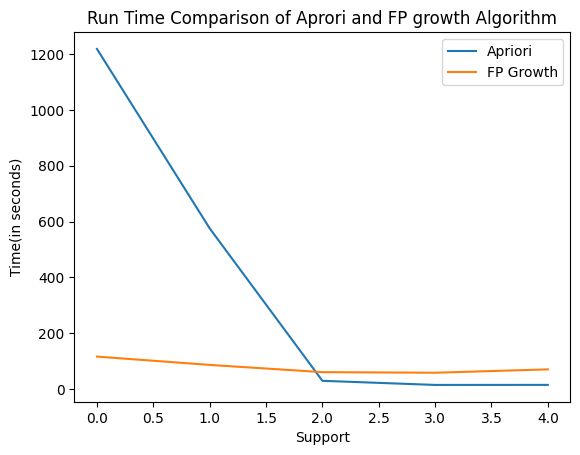

In [15]:
plt.plot(time_apr)
plt.plot(time_fpg)
plt.ylabel('Time(in seconds)')
plt.xlabel('Support')
plt.title('Run Time Comparison of Aprori and FP growth Algorithm')
plt.legend(['Apriori','FP Growth'])
plt.show()

So, for same results, We can use FP Growth algorithm and get our results fasters if our support is very small.